In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('camera_dataset.csv')

In [40]:
df.head()

,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),...,Model_Toshiba PDR-M3,Model_Toshiba PDR-M4,Model_Toshiba PDR-M5,Model_Toshiba PDR-M60,Model_Toshiba PDR-M61,Model_Toshiba PDR-M65,Model_Toshiba PDR-M70,Model_Toshiba PDR-M71,Model_Toshiba PDR-M81,Model_Toshiba PDR-T10
0,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,...,False,False,False,False,False,False,False,False,False,False
1,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,...,False,False,False,False,False,False,False,False,False,False
2,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,...,False,False,False,False,False,False,False,False,False,False
3,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,...,False,False,False,False,False,False,False,False,False,False
4,1999,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,...,False,False,False,False,False,False,False,False,False,False


In [41]:
df.isnull().sum()

Release date             0
Max resolution           0
Low resolution           0
Effective pixels         0
Zoom wide (W)            0
                        ..
Model_Toshiba PDR-M65    0
Model_Toshiba PDR-M70    0
Model_Toshiba PDR-M71    0
Model_Toshiba PDR-M81    0
Model_Toshiba PDR-T10    0
Length: 1049, dtype: int64

In [29]:
df.dropna(subset=['Price'], inplace=True)
df.fillna(df.mean(), inplace=True)

In [30]:
# Convert categorical variables to numeric using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

In [42]:
df.head()

,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),...,Model_Toshiba PDR-M3,Model_Toshiba PDR-M4,Model_Toshiba PDR-M5,Model_Toshiba PDR-M60,Model_Toshiba PDR-M61,Model_Toshiba PDR-M65,Model_Toshiba PDR-M70,Model_Toshiba PDR-M71,Model_Toshiba PDR-M81,Model_Toshiba PDR-T10
0,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,...,False,False,False,False,False,False,False,False,False,False
1,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,...,False,False,False,False,False,False,False,False,False,False
2,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,...,False,False,False,False,False,False,False,False,False,False
3,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,...,False,False,False,False,False,False,False,False,False,False
4,1999,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,...,False,False,False,False,False,False,False,False,False,False


In [32]:
X = df.drop('Price', axis=1)
y = df['Price']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
model = LinearRegression()

In [35]:
model.fit(X_train, y_train)

LinearRegression()

In [36]:
y_pred = model.predict(X_test)

In [37]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [38]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 429755.40030913096
R-squared: 0.3390823542783671


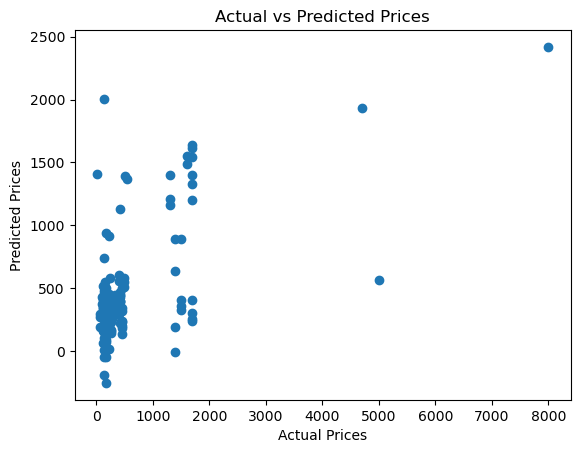

In [39]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()